In [1]:
import numpy as np
import pandas as pd
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("../data/repa_data_20231109.csv")
df.columns

Index(['is_retracted', 'published_time', 'total_comment', 'author_active',
       'comment_len', 'reword', 'squ_published_time', 'squ_total_comment',
       'squ_author_active', 'squ_comment_len', 'squ_reword',
       'sqrt_published_time', 'sqrt_total_comment', 'sqrt_author_active',
       'sqrt_comment_len', 'sqrt_reword'],
      dtype='object')

In [3]:
Y = df["is_retracted"]
X = df.drop("is_retracted", axis=1)

In [6]:
fpr = []
tpr = []
for i in range(1, 51):
    threshold = i / 100.0
    robust_cov = EllipticEnvelope(contamination=threshold)
    robust_cov.fit(X)
    pred = robust_cov.predict(X)
    actual_array = Y.to_numpy()
    res_array = np.where(actual_array == "Yes", -1, 1)
    cm = confusion_matrix(res_array, pred)
    fpr.append(cm[1][0] / (cm[1][0] + cm[1][1]))
    tpr.append(cm[0][0] / (cm[0][0] + cm[0][1]))

f:\Anaconda3\envs\repallm\lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-35.297245227808659 > -35.832603090115356). You may want to try with a higher value of support_fraction (current value: 0.502).
  warnings.warn(
f:\Anaconda3\envs\repallm\lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-43.124108426838802 > -44.605607702378158). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
f:\Anaconda3\envs\repallm\lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-44.816419752326027 > -45.361812676327880). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
f:\A

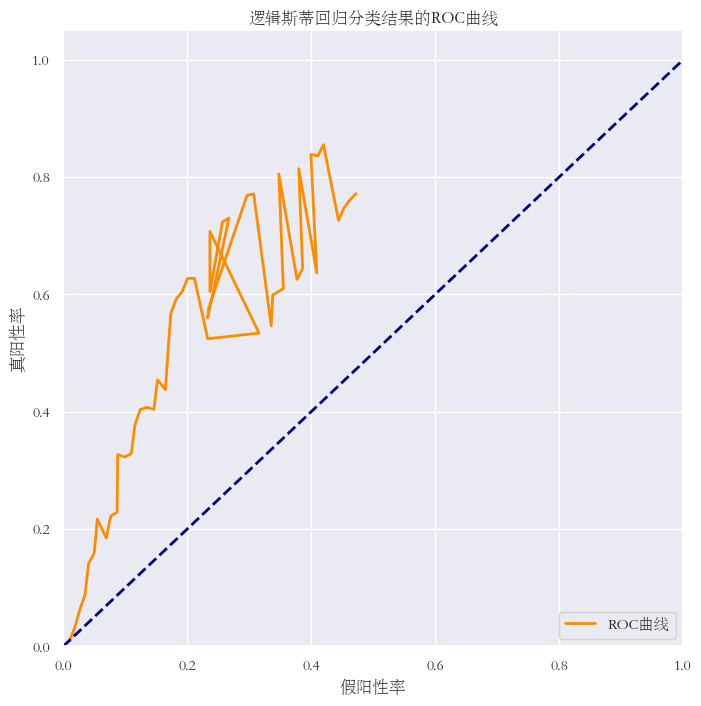

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
plt.rcParams['font.sans-serif'] = ['STSong']
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC曲线')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('假阳性率')
plt.ylabel('真阳性率')
plt.title('逻辑斯蒂回归分类结果的ROC曲线')
plt.legend(loc='lower right')
plt.show()